# Task-1:Advanced Statistical Analysis for Software Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Task-1 b)Apply advanced statistical techniques(e.g.,regression analysis,clustering, etc.)
#to create models that predict user behaviour and app usage patterns.

# Step 1: Data Loading
data = {
    'User ID': [1, 2, 3, 4, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [30, 25, 40, 35, 28],
    'Activity Level': ['Active', 'Moderate', 'Sedentary', 'Active', 'Moderate'],
    'Location': ['Urban', 'Rural', 'Suburban', 'Urban', 'Rural'],
    'App Sessions': [100, 50, 200, 150, 75],
    'Distance Travelled (km)': [50, 20, 100, 75, 30],
    'Calories Burned': [500, 200, 1000, 750, 300]
}
df = pd.DataFrame(data)

In [3]:
# Step 2: Data Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Activity Level'] = label_encoder.fit_transform(df['Activity Level'])
df['Location'] = label_encoder.fit_transform(df['Location'])

In [4]:
df

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,1,30,0,2,100,50,500
1,2,0,25,1,0,50,20,200
2,3,1,40,2,1,200,100,1000
3,4,0,35,0,2,150,75,750
4,5,1,28,1,0,75,30,300


In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'Activity Level', 'Location',
       'App Sessions', 'Distance Travelled (km)', 'Calories Burned'],
      dtype='object')

In [6]:
# Step 3: Feature Selection
col_lst = ['User ID', 'App Sessions']
X = df.drop(col_lst,axis=1)
y = df['App Sessions']

In [7]:
# Step 4: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 5: Regression Analysis
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error:",mse_test)

Mean Squared Error: 22.80807428076422


In [9]:
# Step 6: Clustering
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Silhouette Score
silhouette_score_value = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_score_value}")

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.5602169336580022


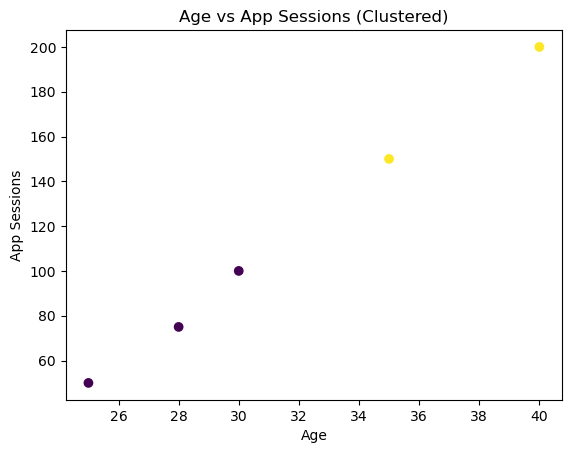

In [10]:
# Step 7: Visualization
plt.scatter(df['Age'], df['App Sessions'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('App Sessions')
plt.title('Age vs App Sessions (Clustered)')
plt.show()